#### Wholesale Customers Analysis

 Problem Statement:

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).


In [1]:
import numpy as np
import pandas as pd
from scipy.stats import f
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power
import random
import statsmodels.api as sm 
%matplotlib inline
sns.set_style("whitegrid")


In [3]:
df=pd.read_csv('Wholesale+Customers+Data.csv')
df_orig=df
display(df.head(10))

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
5,6,Retail,Other,9413,8259,5126,666,1795,1451
6,7,Retail,Other,12126,3199,6975,480,3140,545
7,8,Retail,Other,7579,4956,9426,1669,3321,2566
8,9,Hotel,Other,5963,3648,6192,425,1716,750
9,10,Retail,Other,6006,11093,18881,1159,7425,2098


## 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?

In [4]:
df['Total_Products']=df['Fresh']+df['Milk']+df['Grocery']+df['Frozen']+df['Detergents_Paper']+df['Delicatessen']

In [5]:
#df.pivot_table(values=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'],index=['Channel'],
               #aggfunc=[np.sum])

In [6]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0
Total_Products,440.0,33226.136364,26356.301730,904.0,17448.75,27492.0,41307.50,199891.0


We can clearly see that in Milk,Grocery,Frozen,Detergents_Paper and Delicatessen the 75 percentile value and max value is very far, these can be possible outliers. We will verify this later using boxplot

REGIONWISE DATA


,Region,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Products
0,Lisbon,18095,854833,422454,570037,231026,204136,104327,2386813
1,Oporto,14899,464721,239144,433274,190132,173311,54506,1555088
2,Other,64026,3960577,1888759,2495251,930492,890410,512110,10677599


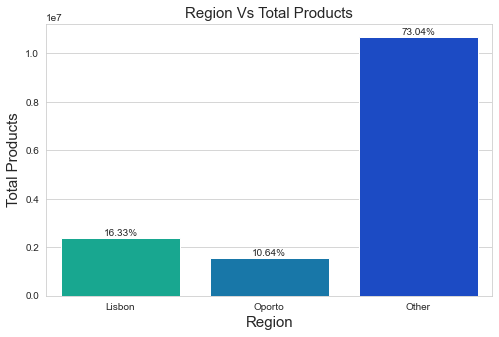

CHANNEL DATA


,Channel,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Products
0,Hotel,71034,4015717,1028614,1180717,1116979,235587,421955,7999569
1,Retail,25986,1264414,1521743,2317845,234671,1032270,248988,6619931


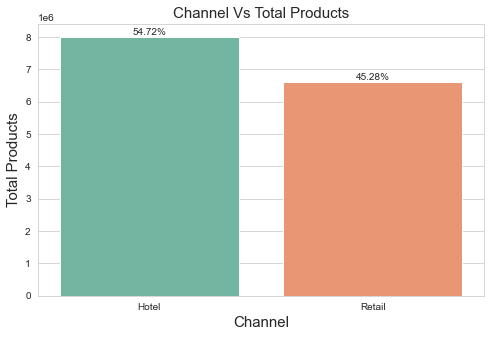

 
REGION + CHANNEL DATA


,Region,Channel,Total_Products
0,Lisbon,Hotel,1538342
1,Lisbon,Retail,848471
2,Oporto,Hotel,719150
3,Oporto,Retail,835938
4,Other,Hotel,5742077
5,Other,Retail,4935522


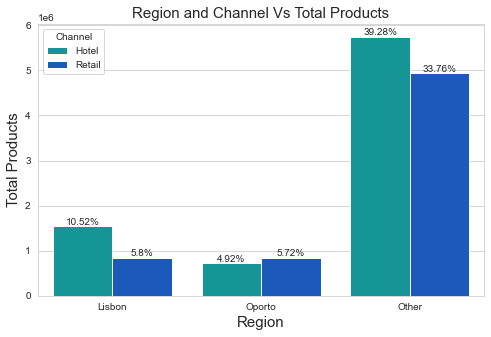

In [7]:
df_reg=df.groupby(['Region']).sum()
df_reg.reset_index(inplace=True)
print('REGIONWISE DATA')
display(df_reg)
print(' ')

plt.figure(figsize=(8,5))
ax=sns.barplot(y=df_reg['Total_Products'],x=df_reg['Region'],palette='winter_r')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    #print(x,y)
    ax.annotate(str(round(y/df['Total_Products'].sum()*100,2))+'%', (x.mean(), y), 
            ha='center', va='bottom')
    
plt.title('Region Vs Total Products',fontdict={'fontsize': 15, 'fontweight': 'medium'})
plt.xlabel('Region',fontdict={'fontsize': 15})
plt.ylabel('Total Products',fontdict={'fontsize': 15})

plt.savefig('df_reg.png')
plt.show()

#########################################################################################################

df_channel=df.groupby(['Channel']).sum()
df_channel.reset_index(inplace=True)
print('CHANNEL DATA')
display(df_channel)

plt.figure(figsize=(8,5))
ax=sns.barplot(y=df_channel['Total_Products'],x=df_channel['Channel'],palette='Set2')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    #print(x,y)
    ax.annotate(str(round(y/df['Total_Products'].sum()*100,2))+'%', (x.mean(), y), 
            ha='center', va='bottom')
    
plt.title('Channel Vs Total Products',fontdict={'fontsize': 15, 'fontweight': 'medium'})
plt.xlabel('Channel',fontdict={'fontsize': 15})
plt.ylabel('Total Products',fontdict={'fontsize': 15})
plt.savefig('df_channel.png')
plt.show()

#########################################################################################################
print(' ')
df_channel_reg=pd.DataFrame(df.groupby(['Region','Channel']).sum()['Total_Products'])
df_channel_reg.reset_index(inplace=True)
print('REGION + CHANNEL DATA')
display(df_channel_reg)

plt.figure(figsize=(8,5))
ax=sns.barplot(y=df_channel_reg['Total_Products'],x=df_channel_reg['Region'],hue=df_channel_reg['Channel'],palette='winter_r')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    #print(x)
    ax.annotate(str(round(y/df['Total_Products'].sum()*100,2))+'%', (x.mean(), y), 
            ha='center', va='bottom')
plt.title('Region and Channel Vs Total Products',fontdict={'fontsize': 15, 'fontweight': 'medium'})
plt.xlabel('Region',fontdict={'fontsize': 15})
plt.ylabel('Total Products',fontdict={'fontsize': 15})    
plt.savefig('df_channel_reg.png')

###### 
-Other Regions are spending more compared to Lisbon and Oporto

-Hotels are spending more compared to Retail


--Retail in all Regions is spending less than Hotel

## 1.2 There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel?  Provide justification for your answer

In [8]:
def color_red(val): 
    if val > 10000:
        color = 'red'
    elif val> 5000 and val <10000:
        color='blue'
    else:
        color='black'
    return 'color: % s' % color 

Behaviour of Items across CHANNEL


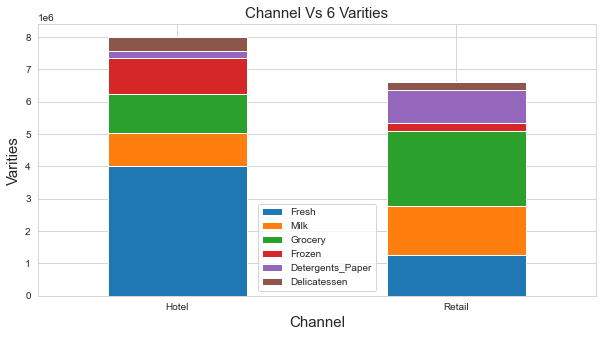

Hotel


,mean,std,min,25%,50%,75%,max
Fresh,13475.560403,13831.687502,3.000000,4070.250000,9581.500000,18274.750000,112151.000000
Milk,3451.724832,4352.165571,55.000000,1164.500000,2157.000000,4029.500000,43950.000000
Grocery,3962.137584,3545.513391,3.000000,1703.750000,2684.000000,5076.750000,21042.000000
Frozen,3748.251678,5643.912500,25.000000,830.000000,2057.500000,4558.750000,60869.000000
Detergents_Paper,790.560403,1104.093673,3.000000,183.250000,385.500000,899.500000,6907.000000
Delicatessen,1415.956376,3147.426922,3.000000,379.000000,821.000000,1548.000000,47943.000000
Total_Products,26844.191275,22164.839073,904.000000,13859.250000,21254.500000,32113.750000,190169.000000


Retail


,mean,std,min,25%,50%,75%,max
Fresh,8904.323944,8987.714750,18.000000,2347.750000,5993.500000,12229.750000,44466.000000
Milk,10716.500000,9679.631351,928.000000,5938.000000,7812.000000,12162.750000,73498.000000
Grocery,16322.852113,12267.318094,2743.000000,9245.250000,12390.000000,20183.500000,92780.000000
Frozen,1652.612676,1812.803662,33.000000,534.250000,1081.000000,2146.750000,11559.000000
Detergents_Paper,7269.507042,6291.089697,332.000000,3683.500000,5614.500000,8662.500000,40827.000000
Delicatessen,1753.436620,1953.797047,3.000000,566.750000,1350.000000,2156.000000,16523.000000
Total_Products,46619.232394,29346.866491,14993.000000,30147.250000,37139.000000,51650.500000,199891.000000


Behaviour of Items across REGION


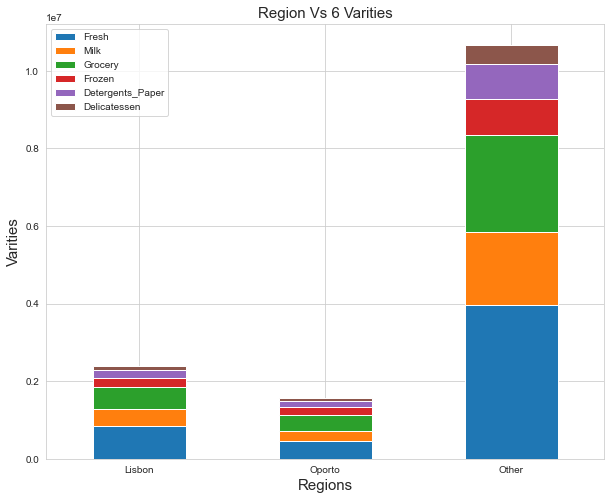

Lisbon


,mean,std,min,25%,50%,75%,max
Fresh,11101.727273,11557.438575,18.000000,2806.000000,7363.000000,15218.000000,56083.000000
Milk,5486.415584,5704.856079,258.000000,1372.000000,3748.000000,7503.000000,28326.000000
Grocery,7403.077922,8496.287728,489.000000,2046.000000,3838.000000,9490.000000,39694.000000
Frozen,3000.337662,3092.143894,61.000000,950.000000,1801.000000,4324.000000,18711.000000
Detergents_Paper,2651.116883,4208.462708,5.000000,284.000000,737.000000,3593.000000,19410.000000
Delicatessen,1354.896104,1345.423340,7.000000,548.000000,806.000000,1775.000000,6854.000000
Total_Products,30997.571429,20321.813773,4925.000000,17184.000000,25385.000000,38699.000000,107155.000000


Oporto


,mean,std,min,25%,50%,75%,max
Fresh,9887.680851,8387.899211,3.000000,2751.500000,8090.000000,14925.500000,32717.000000
Milk,5088.170213,5826.343145,333.000000,1430.500000,2374.000000,5772.500000,25071.000000
Grocery,9218.595745,10842.745314,1330.000000,2792.500000,6114.000000,11758.500000,67298.000000
Frozen,4045.361702,9151.784954,131.000000,811.500000,1455.000000,3272.000000,60869.000000
Detergents_Paper,3687.468085,6514.717668,15.000000,282.500000,811.000000,4324.500000,38102.000000
Delicatessen,1159.702128,1050.739841,51.000000,540.500000,898.000000,1538.500000,5609.000000
Total_Products,33086.978723,24234.507325,4129.000000,20611.500000,26953.000000,36158.500000,130877.000000


Other


,mean,std,min,25%,50%,75%,max
Fresh,12533.471519,13389.213115,3.000000,3350.750000,8752.500000,17406.500000,112151.000000
Milk,5977.085443,7935.463443,55.000000,1634.000000,3684.500000,7198.750000,73498.000000
Grocery,7896.363924,9537.287778,3.000000,2141.500000,4732.000000,10559.750000,92780.000000
Frozen,2944.594937,4260.126243,25.000000,664.750000,1498.000000,3354.750000,36534.000000
Detergents_Paper,2817.753165,4593.051613,3.000000,251.250000,856.000000,3875.750000,40827.000000
Delicatessen,1620.601266,3232.581660,3.000000,402.000000,994.000000,1832.750000,47943.000000
Total_Products,33789.870253,27949.337752,904.000000,17209.250000,28029.000000,42492.250000,199891.000000


In [9]:

ax=df_channel[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicatessen']].plot(kind="bar", stacked=True,figsize=(10,5),rot=0)

ax.set_xticklabels(df_channel['Channel'])
print('Behaviour of Items across CHANNEL')
plt.title('Channel Vs 6 Varities',fontdict={'fontsize': 15, 'fontweight': 'medium'})
plt.xlabel('Channel',fontdict={'fontsize': 15})
plt.ylabel('Varities',fontdict={'fontsize': 15})
plt.savefig('df_channel_prod.png')
plt.show()
for c in ['Hotel','Retail']:
    print(c)
    display(df[df['Channel']==c].describe()[1:].T.iloc[1:].style.applymap(color_red))

ax=df_reg[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicatessen']].plot(kind="bar", stacked=True,figsize=(10,8),rot=0)

ax.set_xticklabels(df_reg['Region'])
print('Behaviour of Items across REGION')
plt.title('Region Vs 6 Varities',fontdict={'fontsize': 15, 'fontweight': 'medium'})
plt.xlabel('Regions',fontdict={'fontsize': 15})
plt.ylabel('Varities',fontdict={'fontsize': 15})
plt.savefig('df_REG_prod.png')
plt.show()
for c in ['Lisbon','Oporto','Other']:
    print(c)
    display(df[df['Region']==c].describe()[1:].T.iloc[1:].style.applymap(color_red))

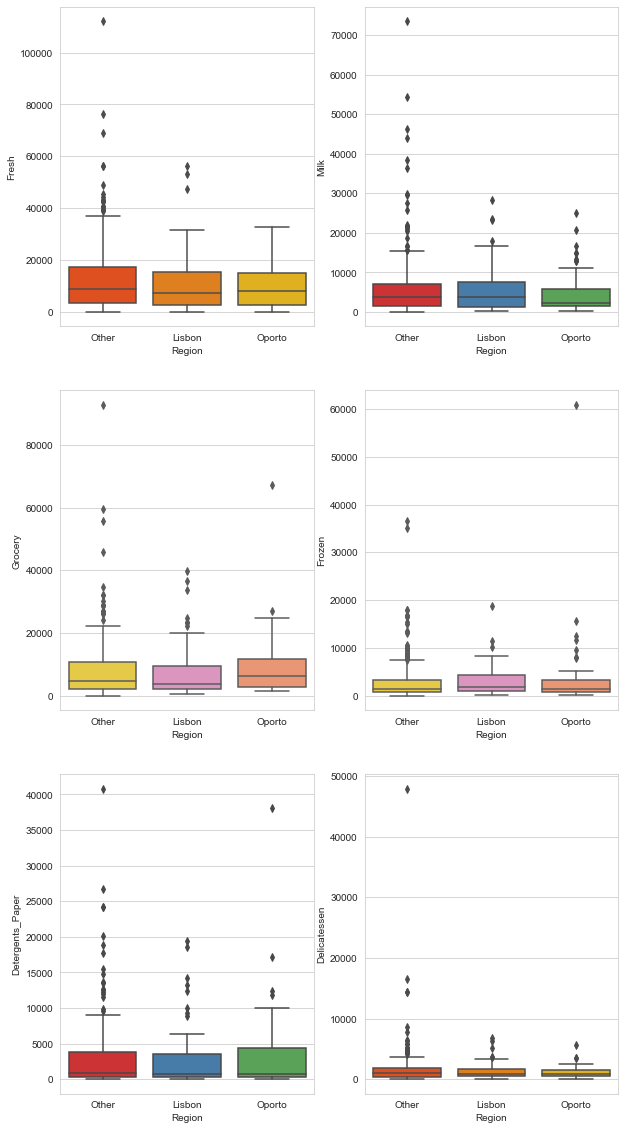

In [10]:
cols=['Fresh', 'Milk', 'Grocery','Frozen', 'Detergents_Paper', 'Delicatessen']
color=[ 'RdPu_r', 'winter', 'winter_r','Set1','Set2_r','plasma','autumn' ]
fig, axes = plt.subplots(3,2,figsize=(10, 20))
i=0
j=0
count=1

for col in cols:
    
    sns.boxplot(ax=axes[i][j],y=col, x="Region",  data=df, palette=random.choice(color))
    #plt.show()
    if count%2==0:
        i+=1
        j=0
    else:
        j+=1
    count+=1


    
plt.savefig('df_Region_prod_out.png')

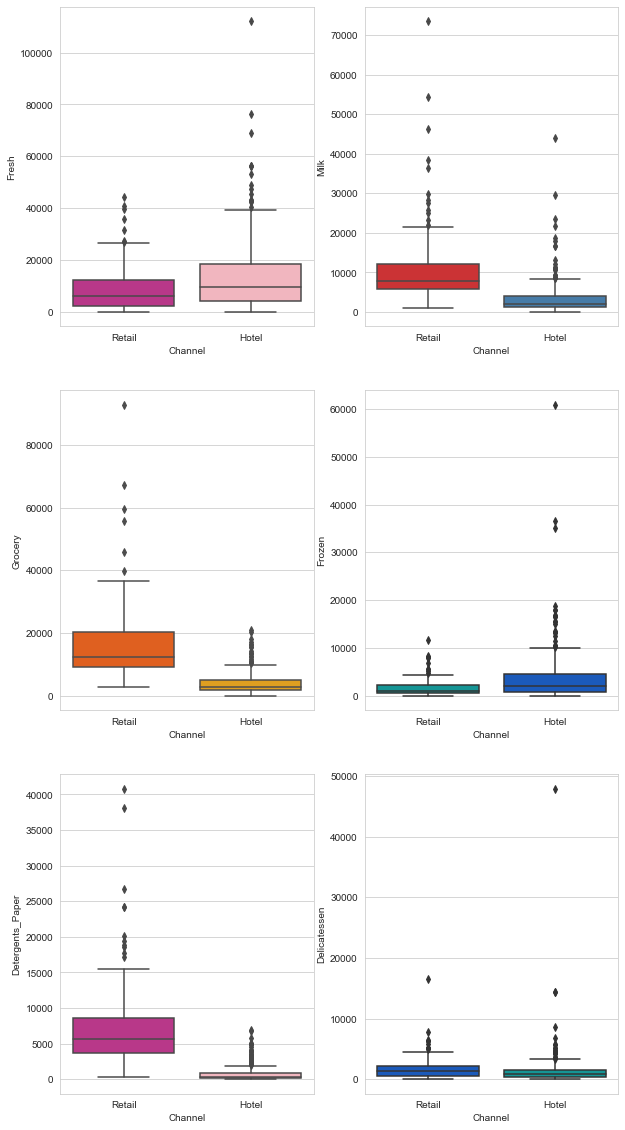

In [11]:
cols=['Fresh', 'Milk', 'Grocery','Frozen', 'Detergents_Paper', 'Delicatessen']
color=[ 'RdPu_r', 'winter', 'winter_r','Set1','Set2_r','plasma','autumn' ]

fig, axes = plt.subplots(3,2,figsize=(10, 20))
i=0
j=0
count=1
for col in cols:
    
    sns.boxplot(ax=axes[i][j],y=col, x="Channel",  data=df, palette=random.choice(color))
    #plt.show()
    if count%2==0:
        i+=1
        j=0
    else:
        j+=1
    count+=1
plt.savefig('df_Channel_prod_o.png')

Hotel
-ANNUAL SPENDING IS HIGHEST ON FRESH AND LOWEST ON Detergents_Paper

-People in hotel want fresh items.

Retail
-ANNUAL SPENDING IS HIGHEST ON GROCERIES AND LOWEST ON Frozen

## 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [12]:
#z_scores = stats.zscore(df[['Buyer/Spender','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen','Total_Products']])

#abs_z_scores = np.abs(z_scores)
#filtered_entries = (abs_z_scores < 1).all(axis=1)
#new_df = df[filtered_entries]
#abs_z_scores

In [13]:

#df_desc['MAD']=abs(new_df[['Buyer/Spender','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen','Total_Products']]
#                   -df_desc['50%']).quantile(0.50)


In [14]:
df_desc=df.describe().T
df_desc['coefficient of variation (CV)']=df_desc['std']/df_desc['mean']
#df_desc['IQR']=df_desc['75%']-df_desc['25%']
display(df_desc[['mean','std','coefficient of variation (CV)']].iloc[1:-1])
display(df_desc[['50%','std','coefficient of variation (CV)']].iloc[1:-1])

,mean,std,coefficient of variation (CV)
Fresh,12000.297727,12647.328865,1.053918
Milk,5796.265909,7380.377175,1.273299
Grocery,7951.277273,9503.162829,1.195174
Frozen,3071.931818,4854.673333,1.580332
Detergents_Paper,2881.493182,4767.854448,1.654647
Delicatessen,1524.870455,2820.105937,1.849407


,50%,std,coefficient of variation (CV)
Fresh,8504.0,12647.328865,1.053918
Milk,3627.0,7380.377175,1.273299
Grocery,4755.5,9503.162829,1.195174
Frozen,1526.0,4854.673333,1.580332
Detergents_Paper,816.5,4767.854448,1.654647
Delicatessen,965.5,2820.105937,1.849407


###### *Comparing all 6 products only Fresh Category has more CONSISTENCY as Coeff. of Variation is low 

###### *Delicatessen > Detergents_Paper shows INCONSISTENT Behaviour


## 1.4 Are there any outliers in the data?

In [15]:
import random

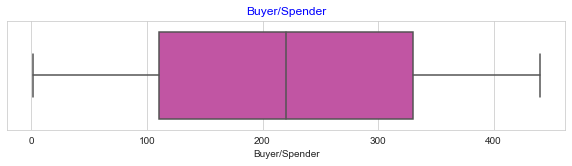

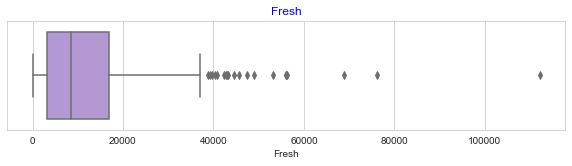

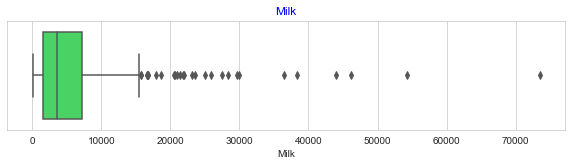

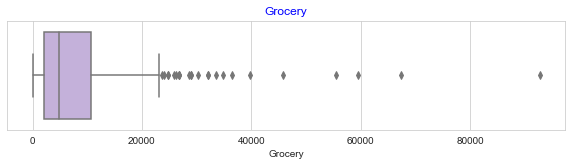

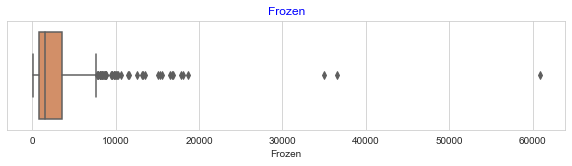

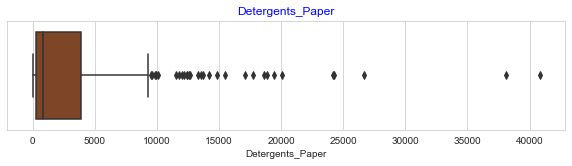

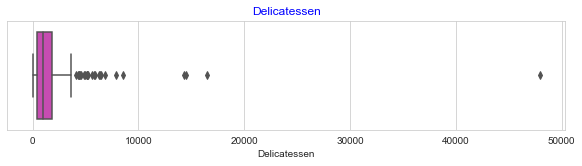

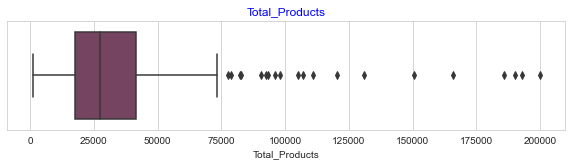

In [16]:
data_plot=df[[i for i in df.columns if df[i].dtype!='object' and '%' not in i]]
#colss=['red','green','blue','yellow','orange','indigo']
colss=[]
for i in range(200):
    colss.append('#%06X' % random.randint(0, 0xFFFFFF))
for i in range(0,len(data_plot.columns)):
    plt.figure(figsize=(10,2))
    c=random.choice(colss)
    ax=sns.boxplot(data_plot[data_plot.columns[i]],color=c)
    ax.set_title(data_plot.columns[i],color='blue')
    
    nam='Outliers'+str(i)+'.png'
    plt.savefig(nam)


plt.show()

### All 6 items has Outliers




## 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

For Business to grow increasing the number of Retail outlets is one way. Future is in collaboration so wherever new Hotels are opened they must collaborate with the retail stores nearby. Marketers need to implement this strategy so that all can earn profits.
There are lot of customers who are buying in large amount, either these orders are for parties, some events or customer is storing for a long time. Keeping both the things in mind giving discount and improving the shelf life of the products is one of the improvements.
Foreign products (Delicatessen) is not liked in Portugal. Before bringing Coffee as a beverage company launched a coffee toffee.      Off course Toffees are cheaper, this is how customers become habitual to the products.				             Same way before bringing a new costly product in the market launching a cheaper variant in the market can be a good idea for the Business.


-Other Regions are spending more compared to Lisbon and Oporto

-Hotels are spending more compared to Retail


--Retail in all Regions is spending less than Hotel


Hotel
-ANNUAL SPENDING IS HIGHEST ON FRESH AND LOWEST ON Detergents_Paper

-People in hotel want fresh items.

Retail
-ANNUAL SPENDING IS HIGHEST ON GROCERIES AND LOWEST ON Frozen


###### *Comparing all 6 products only Fresh Category has more CONSISTENCY as Coeff. of Variation is low 

###### *Delicatessen > Detergents_Paper shows INCONSISTENT Behaviour


## PROBLEM 2

In [35]:
survey=pd.read_csv('Survey.csv')
display(survey.head())

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [36]:

survey_desc=survey.describe()[['GPA','Salary','Text Messages','Spending']].T

display(survey_desc)

,count,mean,std,min,25%,50%,75%,max
GPA,62.0,3.129032,0.377388,2.3,2.9,3.15,3.4,3.9
Salary,62.0,48.548387,12.080912,25.0,40.0,50.00,55.0,80.0
Text Messages,62.0,246.209677,214.465950,0.0,100.0,200.00,300.0,900.0
Spending,62.0,482.016129,221.953805,100.0,312.5,500.00,600.0,1400.0


In [37]:
display((pd.DataFrame(survey[['GPA','Salary','Text Messages','Spending']].skew(axis = 0, skipna = True) )))

,0
GPA,-0.314600
Salary,0.534701
Text Messages,1.295808
Spending,1.585915


###  2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

2.1.1. Gender and Major

In [38]:
majs=pd.crosstab(index=survey['Gender'],columns=survey['Major'],margins=True,margins_name='TOTAL')#.reset_index()
display(majs)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,TOTAL
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
TOTAL,7,4,11,6,10,7,14,3,62


2.1.2. Gender and Grad Intention

In [39]:
display(pd.crosstab(index=survey['Gender'],columns=survey['Grad Intention'],margins=True,margins_name='TOTAL'))

Grad Intention,No,Undecided,Yes,TOTAL
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
TOTAL,12,22,28,62


2.1.4. Gender and Employment

In [40]:
display(pd.crosstab(index=survey['Gender'],columns=survey['Employment'],margins=True,margins_name='TOTAL'))

Employment,Full-Time,Part-Time,Unemployed,TOTAL
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
TOTAL,10,43,9,62


2.1.4. Gender and Computer

In [41]:
display(pd.crosstab(index=survey['Gender'],columns=survey['Computer'],margins=True,margins_name='TOTAL'))

Computer,Desktop,Laptop,Tablet,TOTAL
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
TOTAL,5,55,2,62


#### 2.2.1 What is the probability that a randomly selected CMSU student will be male?

In [42]:
total_studs=survey['Gender'].value_counts().sum()
print('Total no. of students is : ',total_studs)

no_male=survey['Gender'].value_counts()['Male']
print('Probability that a randomly selected CMSU student will be male : ',round((no_male/total_studs),2))

Total no. of students is :  62
Probability that a randomly selected CMSU student will be male :  0.47


#### 2.2.2 What is the probability that a randomly selected CMSU student will be female?

In [43]:
no_female=survey['Gender'].value_counts()['Female']
print('Probability that a randomly selected CMSU student will be male : ',round((no_female/total_studs),2))

Probability that a randomly selected CMSU student will be male :  0.53


#### 2.3.1 Find the conditional probability of different majors among the male students in CMSU.

In [44]:
for maj in majs.columns[:-1]:
    
    p=majs[maj].iloc[1]/majs['TOTAL'].iloc[1]
    num=majs[maj].iloc[1]
    den=majs['TOTAL'].iloc[1]
    print('P ( %s / MALE ) =%s/%s=  %s' %(maj,num,den,round(p,2)))

P ( Accounting / MALE ) =4/29=  0.14
P ( CIS / MALE ) =1/29=  0.03
P ( Economics/Finance / MALE ) =4/29=  0.14
P ( International Business / MALE ) =2/29=  0.07
P ( Management / MALE ) =6/29=  0.21
P ( Other / MALE ) =4/29=  0.14
P ( Retailing/Marketing / MALE ) =5/29=  0.17
P ( Undecided / MALE ) =3/29=  0.1


#### 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [45]:
for maj in majs.columns[:-1]:    
    p=majs[maj].iloc[0]/majs['TOTAL'].iloc[0]
    num=majs[maj].iloc[0]
    den=majs['TOTAL'].iloc[0]
    print('P (%s / FEMALE ) =%s/%s=  %s' %(maj,num,den,round(p,2)))

P (Accounting / FEMALE ) =3/33=  0.09
P (CIS / FEMALE ) =3/33=  0.09
P (Economics/Finance / FEMALE ) =7/33=  0.21
P (International Business / FEMALE ) =4/33=  0.12
P (Management / FEMALE ) =4/33=  0.12
P (Other / FEMALE ) =3/33=  0.09
P (Retailing/Marketing / FEMALE ) =9/33=  0.27
P (Undecided / FEMALE ) =0/33=  0.0


#### 2.4.1 Find the probability That a randomly chosen student is a male AND intends to graduate.

In [46]:
#P(Male and int to grad)
print('The probability That a randomly chosen student is a male and intends to graduate : %s' %(round(17/62,3)))

The probability That a randomly chosen student is a male and intends to graduate : 0.274


#### 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [47]:
print('The probability that a randomly selected student is a female and does NOT have a laptop : %s' %(round(4/62,4)))


The probability that a randomly selected student is a female and does NOT have a laptop : 0.0645


#### 2.5.1 Find the probability that a randomly chosen student is either a male or has a full-time employment

In [48]:
#P(male U fulltime)
print('The probability that a randomly chosen student'+
     ' is either a male or has a full-time employment : %s' %(round((29/62+10/62)-7/62,4)))


The probability that a randomly chosen student is either a male or has a full-time employment : 0.5161


#### 2.5.2 Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [49]:
#P()+P()
print('The conditional probability that given a female student is randomly chosen, \n'+
      'she is majoring in international business or management. %s' %(round(8/33,4)))

The conditional probability that given a female student is randomly chosen, 
she is majoring in international business or management. 0.2424


#### 2.6 Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think graduate intention and being female are independent events?

In [50]:
surv2=survey[survey['Grad Intention']!='Undecided']
display(pd.crosstab(index=surv2['Gender'],columns=surv2['Grad Intention'],margins=True,margins_name='TOTAL'))

Grad Intention,No,Yes,TOTAL
Gender,,,
Female,9,11,20
Male,3,17,20
TOTAL,12,28,40


P(F n Yes)=11/40

P(F)=20/40

P(Yes)=28/40

P(F n Yes) != P(F).P(Yes)

So graduate intention and being female are NOT independent events

#### 2.7 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. Answer the following questions based on the data

#### 2.7.1 If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [51]:
m=survey[survey['GPA']<3]['GPA'].count()
s=survey['GPA'].count()
print('If a student is chosen randomly, the probability that his/her GPA is less than 3 is=%s/%s=%s' %(m,s,round(m/s,2)))

If a student is chosen randomly, the probability that his/her GPA is less than 3 is=17/62=0.27



#### 2.7.2 Find conditional probability that a randomly selected male earns 50 or more. Find conditional probability that a randomly selected female earns 50 or more.

In [52]:
surv_male=survey[(survey['Gender']=='Male') & (survey['Salary']>=50)]
surv_female=survey[(survey['Gender']=='Female') & (survey['Salary']>=50)]
m=surv_male['Gender'].count()
f=surv_female['Gender'].count()
print('Probability that a randomly selected Male earns 50 or more : ',round(m/29,3))
print('Probability that a randomly selected Female earns 50 or more : ',round(f/33,3))


Probability that a randomly selected Male earns 50 or more :  0.483
Probability that a randomly selected Female earns 50 or more :  0.545


#### 2.8.1 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.

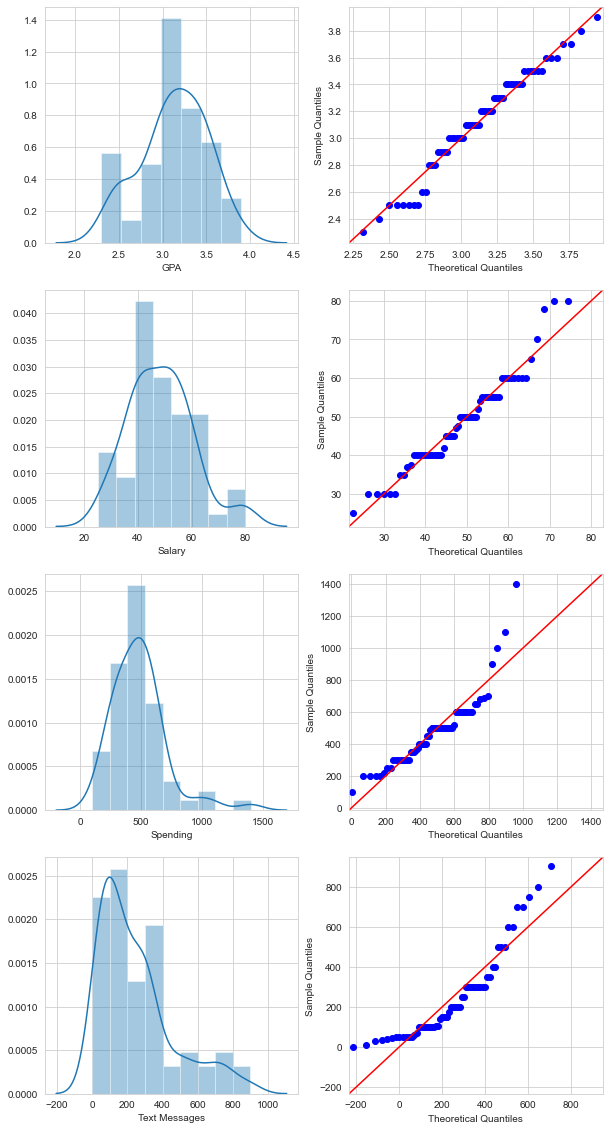

In [53]:
fig, axes = plt.subplots(4,2,figsize=(10, 20))

sns.distplot(survey['GPA'],ax=axes[0][0],)
sm.qqplot(survey['GPA'], line ='45',loc=survey['GPA'].mean(), scale=survey['GPA'].std(),ax=axes[0][1]) 


sns.distplot(survey['Salary'],ax=axes[1][0],)
sm.qqplot(survey['Salary'], line ='45',loc=survey['Salary'].mean(), scale=survey['Salary'].std(),ax=axes[1][1]) 
plt.savefig('male_female_dist1.png')
sns.distplot(survey['Spending'],ax=axes[2][0],)
sm.qqplot(survey['Spending'], line ='45',loc=survey['Spending'].mean(), scale=survey['Spending'].std(),ax=axes[2][1]) 

sns.distplot(survey['Text Messages'],ax=axes[3][0],)
sm.qqplot(survey['Text Messages'], line ='45',loc=survey['Text Messages'].mean(), scale=survey['Text Messages'].std(),ax=axes[3][1]) 
plt.savefig('male_female_dist2.png')
plt.show()


#### We can see that GPA and Salary follows a distribution close to NORMAL

#### Spending is also a close call, if we have more number of samples we may be able to comment better. Still it is close to Normal

#### Text Messages follows a Bell curve and is Right Skewed

#### 2.8.2 Write a note summarizing your conclusions.

•	Sample contains 47% Male students and 53% Female students. A lot of students like Retail/Marketing more than any other stream. Top three streams liked by students in order are:
Retail/Marketing > Economics > Management

•	More Female students are working in Part time jobs and more Male students are working in Full time jobs.

•	27% Male students intend to graduate.

•	Most of the students owns Laptops.

•	4% females do not own a laptop.

•	51% of students are either male or have full time employment.

•	24% female students are majoring International Business or Management.

•	Graduate intention and being female are not independent events.

•	48% Male students have salaries more than 50 and 54% of Female students have salaries more than 50.

•	27 % of Students have GPA less then 3. May be this is because they are working somewhere.

•	Distributions in 4 Numerical variables are close to normal. We can have a better understanding of Distribution if Outliers are removed and sample size is increased.


### 3. An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and colouring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pound per 100 square feet.
### The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


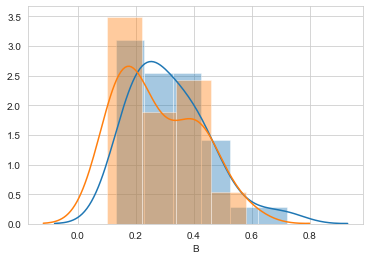

In [54]:
shin=pd.read_csv('A+&+B+shingles.csv')
display(shin.head())
sns.distplot(shin['A'])
sns.distplot(shin['B'])
plt.show()

* We want to take precautionary measures if there is more moisture content

For the A shingles, the null and alternative hypothesis to test whether the population

mean moisture content is less than 0.35 pound per 100 square feet is given:

H0= u<=0.35

HA= u>0.35
******************************************************************************************************************************
******************************************************************************************************************************
For the B shingles, the null and alternative hypothesis to test whether the population

mean moisture content is less than 0.35 pound per 100 square feet is given:

H0: u<=0.35

HA: u>0.35
******************************************************************************************************************************
alpha=0.05

#### 3.1 Do you think there is evidence that mean moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.


In [55]:
t1,p1=ttest_1samp(shin['A'], 0.35)
t1,p1=t1,p1/2
print('t-stat and p_val for A Shingles are %s and %s'%(round(t1,3),round(p1,3)))

t-stat and p_val for A Shingles are -1.474 and 0.075


In [56]:
t2,p2=ttest_1samp(shin['B'], 0.35,nan_policy='omit')
t2,p2=t2,p2/2
print('t-stat and p_val for B Shingles are %s and %s'%(round(t2,3),round(p2,3)))

t-stat and p_val for B Shingles are -3.1 and 0.002


Since in  A Shingles p value> alpha
* We have enough evidence to accept NULL HYPOTHESIS 

Since in  B Shingles p value< alpha
* We have enough evidence to reject NULL HYPOTHESIS 

#### 3.2 Do you think that the population means for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

Assumptions:

-Both A and B are INDEPENDENT variables.

-Scale of measurement applied to the data collected follows a continuous scale.

-Variables follows a normal distribution


   $\alpha$ = 0.05 and the population standard deviation is not known.

    * We have two samples and we do not know the population standard deviation.
    * Sample sizes for both samples are  not same.

    Null Hypothesis states that the population means for shingles A and B are equal

    H0: uA=uB

    Alternative Hypothesis states that that the population means for shingles A and B are not equal 

    HA: uA!=uB

In [57]:
t_statistic, p_value  = ttest_ind(shin['A'],shin['B'],nan_policy='omit')
print('tstat',t_statistic)    
print('P Value',p_value)    

tstat 1.2896282719661123
P Value 0.2017496571835306


* Two-sample t-test p-value= 0.2017496571835306

Since p value > alpha 

We have enough evidence to ACCEPT the null hypothesis.

We conclude that the population means for shingles A and B are equal.